![](tec.png)


    
## Análisis de Datos Masivos
## ContadorSqlite
## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Najib Alejandro Loera Rodriguez

### Paso1: Conectarse a la base de datos

In [114]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [115]:
conn = sqlite3.connect('InternetSpeed.db')

In [116]:
cur = conn.cursor()

In [117]:
consulta = 'SELECT DateTime FROM LA_wifi_speed_UK LIMIT 10;'

cur.execute(consulta)
for x in cur:
    print(x)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [118]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for x in cur:
    print(x)

('2016-12-10 02:30:00.000000',)
('2016-12-08 04:00:00.000000',)
('2016-11-27 05:30:00.000000',)
('2016-12-04 02:00:00.000000',)
('2016-11-26 05:30:00.000000',)
('2016-12-12 00:00:00.000000',)
('2016-12-04 02:30:00.000000',)
('2016-12-13 16:00:00.000000',)
('2016-12-06 01:30:00.000000',)
('2016-12-06 15:30:00.000000',)


In [119]:


# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)



In [120]:
# Code Cell 11
#visualizing the first 10 rows of the field description
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [121]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]


In [122]:
# ignore index column
columns = columns[1:]


In [123]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

# this operation is to remove duplicates
columns = list(set(columns))


In [124]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E07000168',
 'E07000223',
 'E08000020',
 'E07000062',
 'E07000048',
 'E07000228',
 'E07000192',
 'E07000034',
 'E08000034',
 'E06000020']

In [125]:
# Code Cell 15
area = columns[0]
print (area)

E07000168


In [126]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000168')

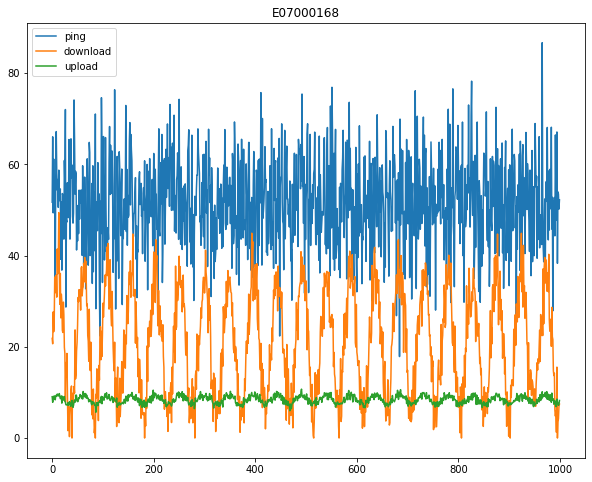

In [127]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query='SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area,s)
    
    cur.execute(query)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

### Parte 3: Manipule los datos con pandas

In [128]:
# Code Cell 18
new_columns = ['Area', 'Average_p', 'Average_u', 'Average_d']

df = pd.DataFrame(columns = new_columns)
df


,Area,Average_p,Average_u,Average_d


In [129]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i],s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

,Area,Average_p,Average_u,Average_d
0,E07000168,51.677283,21.116878,8.402078
1,E07000223,50.923624,20.453399,8.241653
2,E08000020,53.251025,21.993000,8.776633
3,E07000062,51.817549,20.912328,8.325171
4,E07000048,50.447718,20.504195,8.166830


In [130]:
df.count()

Area         326
Average_p    326
Average_u    326
Average_d    326
dtype: int64

In [131]:
len(df)

326

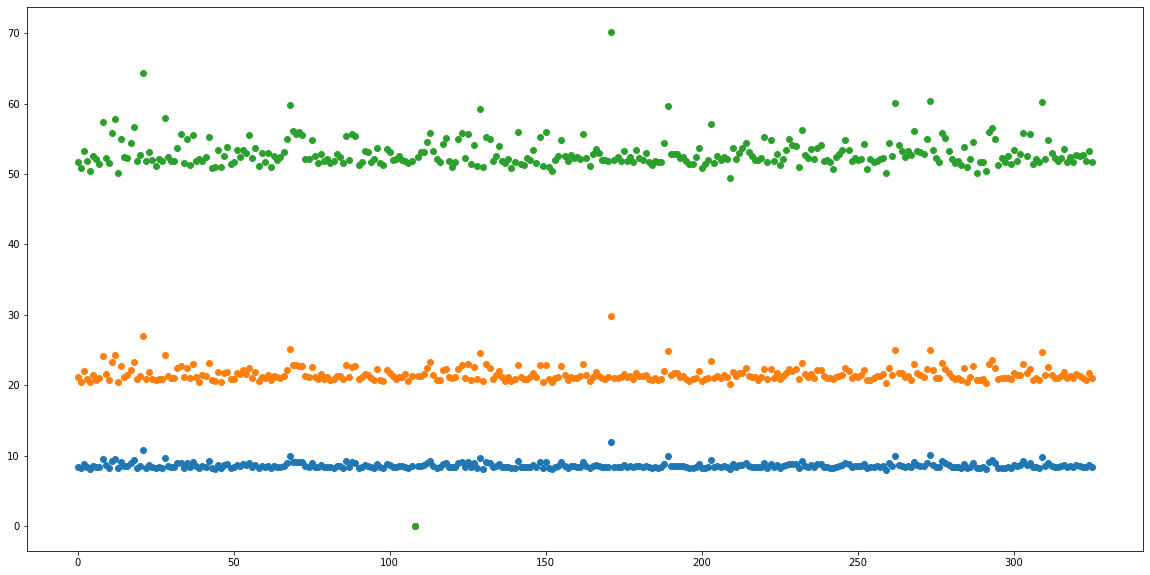

In [132]:


# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')



In [140]:
#Se borra la tabla en caso de que esta exista
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass
#df.to_sql('average_speed',conn)      

In [141]:

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)
# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E07000168', 51.67728333376561, 21.116877506545816, 8.402077973814274)
(1, 'E07000223', 50.92362409905345, 20.453398977533574, 8.241652932074452)


### Parte 4: Una las tablas con pandas

In [142]:
query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [136]:
# Code Cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print (row)
    
    k+=1

(0, 'E07000168', 51.67728333376561, 21.116877506545816, 8.402077973814274, 'Scarborough', 'E07000168', 108793)
(1, 'E07000223', 50.92362409905345, 20.453398977533574, 8.241652932074452, 'Adur', 'E07000223', 61182)
(2, 'E08000020', 53.25102493363281, 21.993000231368384, 8.776633463657399, 'Gateshead', 'E08000020', 200214)
(3, 'E07000062', 51.8175490874913, 20.912328333264924, 8.325171002581019, 'Hastings', 'E07000062', 90254)
(4, 'E07000048', 50.447717952041806, 20.504195024456745, 8.16682968735289, 'Christchurch', 'E07000048', 47752)
(5, 'E07000228', 52.53279642809847, 21.423004306543007, 8.506100687993287, 'Mid Sussex', 'E07000228', 139860)
(6, 'E07000192', 52.21186919385844, 20.804881611149966, 8.34426803535672, 'Cannock Chase', 'E07000192', 97462)
(7, 'E07000034', 51.42037141814067, 21.033130267892673, 8.374590908954856, 'Chesterfield', 'E07000034', 103788)
(8, 'E08000034', 57.45551794456299, 24.107962500908204, 9.555662935825397, 'Kirklees', 'E08000034', 422458)
(9, 'E06000020', 52